<div style="text-align: right">INFO 6105 Data Sci Engineering Methods and Tools, Lecture 3 Day 1</div>
<div style="text-align: right">Dino Konstantopoulos, 27 September 2021, with material from Peter Norvig, Chris Fonnesbeck, and Ned Batchelder</div>

## Introduction to the NumPy library

`NumPy` is our performance and math library. It's a C-module, so it gets compiled to machine code and is blazing fast. It;s the **engine** that makes the Python snail fast!

<br />
<center>
    <img src="ipynb.images/RocketSnail.png" width=400 />
</center>

Let's quickly review some Python data structures.

### Review: Python Sets

In [1]:
s = set()
s.add(1)
s.add(2)
s.add(1)
s

{1, 2}

In [3]:
file = open("http_log.txt", "r")
lines = file.readlines()
file.close()
ip_addresses = set(map(lambda x: x.split('-')[0], lines))
print(ip_addresses)

{'116.71.50.81 ', '66.249.67.117 ', '98.246.45.87 ', '59.93.82.110 ', '204.97.75.234 ', '208.80.194.44 ', '208.80.194.56 ', '216.204.33.226 ', '198.169.188.225 ', '192.35.79.70 ', '59.96.97.77 ', '68.109.227.198 ', '66.170.231.127 ', '203.129.204.49 ', '59.96.109.33 ', '124.247.222.206 ', '59.103.11.163 ', '66.170.227.42 ', '209.172.119.5 ', '74.62.155.43 ', '129.83.31.2 ', '207.68.114.15 ', '222.187.220.162 ', '91.194.42.52 ', '59.103.26.145 ', '116.71.47.122 ', '198.169.189.226 ', '59.93.64.161 ', '212.235.5.188 ', '59.93.92.14 ', '192.168.2.13 ', '192.168.2.12 ', '198.64.129.244 ', '207.77.135.68 ', '65.112.145.106 ', '216.86.52.162 ', '194.8.75.212 ', '206.145.28.20 ', '72.237.250.93 ', '129.83.31.1 ', '195.242.98.161 ', '61.29.67.222 ', '208.80.194.48 ', '116.71.43.234 ', '159.140.254.10 ', '71.192.48.105 ', '122.50.137.176 ', '203.200.213.98 ', '72.245.200.114 ', '59.96.97.76 ', '91.121.134.62 ', '68.191.152.26 ', '64.185.117.181 ', '202.59.80.153 ', '69.30.67.191 ', '71.233.70.4

Most important list manipulation functions are *map*, *reduce*, and *filter*

### Review: Python List Comprehensions

List comprehensions are transformations of lists

In [6]:
even_numbers = (x for x in range(100) if x % 2 == 0)
zeroes = [0 for _ in range(100)]
pairs = [(x,y) for x in range(100) for y in range(100)]
print(pairs)

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (0, 42), (0, 43), (0, 44), (0, 45), (0, 46), (0, 47), (0, 48), (0, 49), (0, 50), (0, 51), (0, 52), (0, 53), (0, 54), (0, 55), (0, 56), (0, 57), (0, 58), (0, 59), (0, 60), (0, 61), (0, 62), (0, 63), (0, 64), (0, 65), (0, 66), (0, 67), (0, 68), (0, 69), (0, 70), (0, 71), (0, 72), (0, 73), (0, 74), (0, 75), (0, 76), (0, 77), (0, 78), (0, 79), (0, 80), (0, 81), (0, 82), (0, 83), (0, 84), (0, 85), (0, 86), (0, 87), (0, 88), (0, 89), (0, 90), (0, 91), (0, 92), (0, 93), (0, 94), (0, 95), (0, 96), (0, 97), (0, 98), (0, 99), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1

In [7]:
even_numbers = (x for x in range(100) if x % 2 == 0)

In [8]:
print(list(even_numbers))

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98]


In [10]:
values = [1,2,3,4,5,6,7,8,9]
even = list(filter(lambda x: x % 2 ==0, values))
even

[2, 4, 6, 8]

In [11]:
from functools import reduce
summed = reduce(lambda a,b: a + b, values)
summed

45

In [37]:
add_10 = [x + 10 for x in values]
add_10

[11, 12, 13, 14, 15, 16, 17, 18, 19]

### Review: Enumerations and Generators

In [ ]:
# generator
def my_lazy_range(n):
    i = 0
    while i < n:
        yield i
        i += 1
        
for i in my_lazy_range(10):
    print(i)
    
# enumeration
a = range(100)
print(a)

In [38]:
l = [1, 2, "foo", "bar"]
l

[1, 2, 'foo', 'bar']

# 1. Practical Introduction to NumPy

Ok, let's officially introduce NumPy.

Numpy adds Python support for large multi-dimensional arrays and matrices, along with a library of high-level mathematical functions to operate on these arrays. Numpy is the first and lowest level data science extension for Python. It focuses on number calculations, reads in fixed datatypes, improves RAM efficiency, and teaches you to think in **Vectors**, **Matrices**, and **Tensors**.

## Array Attributes

First let's discuss some useful array attributes.
We'll start by defining three random arrays, a one-dimensional, two-dimensional, and three-dimensional array.
We'll use NumPy's random number generator, which we will *seed* with a set value in order to ensure that the same random arrays are generated each time this code is run:

In [12]:
import numpy as np
np.random.seed(0)  # seed for reproducibility

x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

In [13]:
x1

array([5, 0, 3, 3, 7, 9])

In [14]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [15]:
x3

array([[[8, 1, 5, 9, 8],
        [9, 4, 3, 0, 3],
        [5, 0, 2, 3, 8],
        [1, 3, 3, 3, 7]],

       [[0, 1, 9, 9, 0],
        [4, 7, 3, 2, 7],
        [2, 0, 0, 4, 5],
        [5, 6, 8, 4, 1]],

       [[4, 9, 8, 1, 1],
        [7, 9, 9, 3, 6],
        [7, 2, 0, 3, 5],
        [9, 4, 4, 6, 4]]])

Each array has attributes ``ndim`` (the number of dimensions), ``shape`` (the size of each dimension), and ``size`` (the total size of the array):

In [43]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60


If you are comfortable with Python's standard list indexing with `[]`, indexing in NumPy is the same, plus more.
In a one-dimensional array, the $i^{th}$ value (counting from zero) can be accessed by specifying the desired index in square brackets, just as with Python lists:

In [16]:
x1

array([5, 0, 3, 3, 7, 9])

In [17]:
x1[0]

5

In multi-dimensional arrays, items can be accessed using either standard python indexing (`[][]`), or with a comma-separated tuple of indices: `[ , ]`

In [18]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [19]:
x2[0][0]

3

In [20]:
x2[0, 0]

3

In [21]:
x3[0][0][0]

8

In [22]:
x3[0,0,0]

8

Values can also be modified using any of the above index notation:

x2[0, 0] = 12
x2

## One-dimensional subarrays

In [23]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [24]:
x[:5]  # first five elements

array([0, 1, 2, 3, 4])

In [25]:
x[5:]  # elements after index 5

array([5, 6, 7, 8, 9])

In [26]:
x[4:7]  # middle sub-array

array([4, 5, 6])

In [27]:
x[::2]  # every other element

array([0, 2, 4, 6, 8])

### Multi-dimensional subarrays (matrices, tensors)

Multi-dimensional slices work in the same way, with multiple slices separated by commas.
For example:

In [57]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [28]:
x2[:2, :3]  # two rows, three columns

array([[3, 5, 2],
       [7, 6, 8]])

In [29]:
x2[:3, ::2]  # all rows, every other column

array([[3, 2],
       [7, 8],
       [1, 7]])

## Reshaping of Arrays

Another ***amazingly*** useful type of operation is **reshaping of arrays**.

The most flexible way of doing this is with the ``reshape`` method.
For example, if you want to put the numbers 1 through 9 in a $3 \times 3$ grid, you can do the following:

In [30]:
np.arange(1, 10).reshape((3, 3))

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

This is a 4-dimensional *beast*:

In [33]:
import numpy as np
grid = np.arange(1, 10).reshape((3, 3, 1, 1, 1))
print(grid)

[[[[[1]]]


  [[[2]]]


  [[[3]]]]



 [[[[4]]]


  [[[5]]]


  [[[6]]]]



 [[[[7]]]


  [[[8]]]


  [[[9]]]]]


It's really just a 2D structure though. *embedded* in a 4D space. You can *squeeze* that structure out of its 4D space with the `squeeze` operator:

In [34]:
np.squeeze(grid)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Where possible, the ``reshape`` method will use a no-copy view of the initial array, but with non-contiguous memory buffers this is not always the case.

A common reshaping pattern is the conversion of a one-dimensional array into a two-dimensional row or column matrix. Let's do it *again*: This is a **vector** (single row) expressed as a **matrix**:

In [ ]:
x = np.array([1, 2, 3])

# row vector to a matrix via reshape
m = x.reshape((1, 3))
m

Here we reshape to an even higher dimension. This is a **vector** (single row) expressed as a **tensor** (3D matrix) 

In [ ]:
# reshape to a tensor!
t = x.reshape((3, 1, 1))
t

How do we undo this *unfolding*? With NumPy's `squeeze()` API:

In [ ]:
np.squeeze(m, axis=0)

In [ ]:
np.squeeze(m)

In [ ]:
np.squeeze(t, axis=1)

In [ ]:
np.squeeze(np.squeeze(t, axis=1), axis=1)

In [ ]:
np.squeeze(np.squeeze(t))

## Array Concatenation and Splitting

All of the preceding routines worked on single arrays. It's also possible to combine multiple arrays into one, and to conversely split a single array into multiple arrays.

### Concatenation of arrays

**Concatenation**, or joining of two arrays in NumPy, is primarily accomplished using the routines ``np.concatenate``, ``np.vstack``, and ``np.hstack``.
``np.concatenate`` takes a tuple or list of arrays as its first argument, as we can see here:

In [35]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

It can also be used for two-dimensional arrays:

In [36]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])

In [37]:
# concatenate along the first axis
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [38]:
# concatenate along the second axis (zero-indexed)
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

### Splitting of arrays

The opposite of concatenation is **splitting**, which is implemented by the functions ``np.split``, ``np.hsplit``, and ``np.vsplit``.  For each of these, we can pass a list of indices giving the split points:

In [40]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


## Finding maximum element

The `numpy.argmax(a, axis=None, out=None)` function returns the indices of the
maximum values along an axis.
In a 2d array, we can easily obtain the index of the maximum value as follows:

In [41]:
array = (
        np.array([[1,2,3],
                  [4,5,6]])
)
array

array([[1, 2, 3],
       [4, 5, 6]])

In [42]:
# numpy array
array = np.array([[1,2,3], [4,5,6]])

# index of maximum value
max_pos = np.argmax(array)
max_pos
#5

5

In [43]:
array.reshape(6)[5]

6

The `argmax` operator is used a lot in ML.

We can obtain the indeces of maximum values along a specified axis, providing 0 or 1 to the axis attribute

In [ ]:
# numpy array
array = np.array([[1,2,3],[4,5,6]])

# index of maximum value along axis 0
max_pos_0 = np.argmax(array, axis=0)
print(max_pos_0)
# array([1, 1, 1], dtype=int64)

# index of maximum value along axis 1
max_pos_1 = np.argmax(array, axis=1)
max_pos_1
# array([2, 2], dtype=int64)

## Plotting with matplotlib

Cannot do data science with ***plotting***!

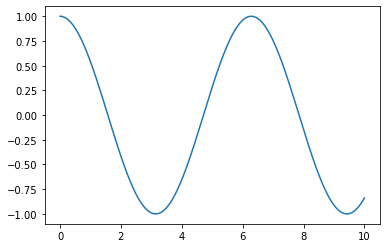

In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0,10,300)
y = np.cos(x)
myplot = plt.plot(x,y)

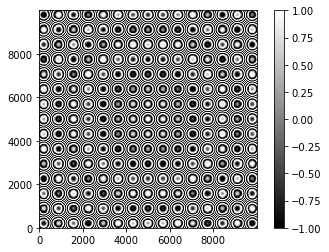

In [46]:
points = np.arange(-50,50,0.01)
x, y = np.meshgrid(points, points)
z = np.cos(x**2 + y**2)
plt.imshow(z, cmap = plt.cm.gray); plt.colorbar()

## Operation profiling

In [89]:
np.array('1,2,3,4')
np.array(np.mat('1,2; 3,4'))

array([[1, 2],
       [3, 4]])

In [90]:
myarr = np.arange(1000000)
mylist = range(1000000)
%time for _ in range(10): myarr = myarr * 2
%time for _ in range(10): [x * 2 for x in mylist]

Wall time: 46.5 ms
Wall time: 1.98 s


## Random arrays

*Sooooooo* useful!

In [91]:
myarray = np.array([[1,2,3], [4,5,6], [7,8,9]])
myarray

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [93]:
data = np.random.rand(4,4,4)
data

array([[[0.971945  , 0.87819347, 0.50962438, 0.05571469],
        [0.45115921, 0.01998767, 0.44171092, 0.97958673],
        [0.35944446, 0.48089353, 0.68866118, 0.88047589],
        [0.91823547, 0.21682214, 0.56518887, 0.86510256]],

       [[0.50896896, 0.91672295, 0.92115761, 0.08311249],
        [0.27771856, 0.0093567 , 0.84234208, 0.64717414],
        [0.84138612, 0.26473016, 0.39782075, 0.55282148],
        [0.16494046, 0.36980809, 0.14644176, 0.56961841]],

       [[0.70373728, 0.28847644, 0.43328806, 0.75610669],
        [0.39609828, 0.89603839, 0.63892108, 0.89155444],
        [0.68005557, 0.44919774, 0.97857093, 0.11620191],
        [0.7670237 , 0.41182014, 0.67543908, 0.24979628]],

       [[0.31321833, 0.96541622, 0.58846509, 0.65966841],
        [0.53320625, 0.23053302, 0.39486929, 0.61880856],
        [0.47486752, 0.47013219, 0.71607453, 0.287991  ],
        [0.38346223, 0.74916984, 0.87845219, 0.10286336]]])

## Boolean indexing:

In [ ]:
names = np.array([1, 'foo'])
type(names[0])

In [95]:
names = np.array(['bob', 'dino', 'ravi', "jane"])
print(names == 'bob')

[ True False False False]


In [97]:
data = np.random.rand(4,4)
data

array([[0.23074234, 0.7649117 , 0.94412352, 0.74999925],
       [0.33940382, 0.48954894, 0.33898512, 0.17949026],
       [0.1709866 , 0.46345098, 0.87457296, 0.94411975],
       [0.60825287, 0.59665541, 0.78364425, 0.5000263 ]])

In [98]:
data[names == 'bob']

array([[0.23074234, 0.7649117 , 0.94412352, 0.74999925]])

In [ ]:
arr = np.arange(32).reshape(8,4)
arr

## Beginner Linear Algebra

This is just a quick *appetizer*...

In [47]:
from numpy.linalg import inv
X = np.random.randn(4,4)
X

array([[ 1.25441407,  1.41910204, -0.74385608, -2.5174371 ],
       [-1.50709602,  1.14907613, -1.19357825,  1.14104245],
       [ 1.50944508,  1.06777513, -0.68658948,  0.01487332],
       [-0.3756659 , -0.03822364,  0.36797447, -0.0447237 ]])

In [48]:
Y = inv(X)
Y

array([[-0.11130717, -0.26252984,  0.4199617 , -0.29296906],
       [ 0.06476256,  0.21727596,  0.69282752,  2.12840301],
       [-0.15202989, -0.23791638,  0.55372371,  2.67170893],
       [-0.37126339,  0.06196429,  0.43620079,  0.26437586]])

In [104]:
X @ Y

array([[ 1.00000000e+00, -1.77635684e-15,  1.77635684e-15,
         0.00000000e+00],
       [ 8.88178420e-16,  1.00000000e+00, -1.77635684e-15,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [ 8.88178420e-16,  8.88178420e-16,  0.00000000e+00,
         1.00000000e+00]])

## Introduction to statistics with NumPy

The `numpy.histogram(a, bins=10, range=None, normed=None, weights=None,
density=None)` computes the [histogram](https://en.wikipedia.org/wiki/Histogram) of a set of data. 

The function returns 2 values:
- the frequency count
- the bin edges

>Example
The following data frame contains the height of 5000 men. We create a histogram plot,
passing kind=’hist’ to the plot method.


# Numpy *'Objects'*

In [117]:
class Human(object):
    # A class attribute. It is shared by all instances of this class
    species = "H. sapiens"

    def __init__(self, name):
        # Assign the argument to the instance's name attribute
        self.name = name

        # Initialize property
        self.age = 0
        
    def say(self, msg):
        return "{0}: {1}".format(self.name, msg)

In [116]:
a = Human("Dino")
b = Human("Elon")
c = np.array([a, b])
c

array([<__main__.Human object at 0x0000015A26A38EB8>,
       <__main__.Human object at 0x0000015A26A38CC0>], dtype=object)

# 2. The theory

So why does NumPy make python runs so fast?

## Origins
Jupyter originates from IPython, an effort to make Python development more interactive. Since its inception, the scope of the project has expanded to include **Ju**lia, **Py**thon, and **R**, so the name was changed to **Jupyter** as a reference to these core languages. 

A common question: *Is Python interpreted or compiled*?

In the simple model of the world, **compile** means to convert a program in a high-level language into a binary executable full of machine code (CPU instructions). When you compile a C program, this is what happens. The result is a file that your operating system can run for you.

In the simple definition of **interpreted**, the source code is not directly run by the target machine. There is another program called the interpreter that reads and executes the source code directly. The interpreter, which is specific to the target machine, translates each statement of the source code into machine code and runs it. "Interpreted* is the way most command shells operate.

But the real world is not so limited. Making real programming languages useful and powerful involves a wider range of possibilities about how they work. Compiling is a more general idea: take a program in one language (or form), and convert it into another, usually more lover-level, language or form. If you compile to the same level, as you would if you for example compiled javascript into java, then you usually use the word **transpiler**. 

In Python, the source code is indeed compiled into a much simpler form called **bytecode**, just like java and C#. Bytecode are instructions similar in spirit to CPU instructions, but instead of being executed by the CPU, they are executed by software called a **virtual machine** or a **runtime**. Note that these *are not* VM’s that emulate entire operating systems, just a simplified CPU execution environment.

In Python 2, the bytecode is stored in a .pyc file. In Python 3, the bytecode files are stored in a folder named __pycache__. This folder is automatically created when you try to import another file that you created.

>**Note**: We can also use the `compile()` function to compile a string that contains the Python source code. The syntax of this function is: `compile(source, filename, mode, flag, dont_inherit, optimize)`

> We only focus on the first three arguments which are required (the others are optional). `source` is the source code to compile which can be a String, a Bytes object, or an AST object. `filename` is the name of the file that the source code comes from. If the source code does not come from a file, you can write whatever you like or leave an empty string. `mode` can be:
`exec`: accepts Python source code in any form (any number of statements or blocks). It compiles them into a bytecode that finally returns None
`eval` : accepts a single expression and compiles it into a bytecode that finally returns the value of that expression
`single`: only accepts a single statement (or multiple statements separated by ;). If the last statement is an expression, then the resulting bytecode prints the repr() of the value of that expression to the standard output.

An important aspect of Python’s compilation to bytecode is that it’s entirely **implicit**. You never invoke a compiler, you simply run a .py file. The Python implementation compiles the files as needed. This is different than Java and C#, for example, where you have to run the Java or C# compiler to turn Java or C# source code into compiled class files. For this reason, Java and C# are often called compiled languaged, while Python is called an interpreted language. ***But both compile to bytecode, and then both execute the bytecode with a software implementation of a virtual machine***!

Another important Python feature is its interactive prompt. You can type Python statements and have them immediately executed. This interactivity is usually missing in "*compiled*” languages, but even at the Python interactive prompt, your Python ***is compiled to bytecode**, and then ***the bytecode is executed***. This immediate execution, and Python’s lack of an explicit compile step, are why people call the Python executable “**the Python interpreter**.”

And even this is a simplified description of how these languages can work! “Compiled” languages like Java and C# can have interactive prompts, but they are not at the center of those worlds in the same way that Python’s is. Java originally always compiles to bytecode, but then it pioneered **just-in-time** (JIT) (a.k.a. **ahead-of-time**) techniques for compiling directly to machine code at runtime, and now Java is sometimes compiled entirely to machine code, in the C style.

This shows just how flimsy the words “**interpreted**” and “**compiled**” can be. Like most adjectives applied to programming languages, they are thrown around as if they were black-and-white distinctions, but the reality is much subtler and complex.

Finally, how your program gets executed isn’t a characteristic of the language at all: it’s about the language implementation. I’ve been talking here about Python, but this has really been a description of **CPython**, the usual implementation of Python, so-named because it is written in C. **PyPy** is another implementation, using a JIT compiler to run code much faster than CPython can.

Python also has multiple implementations. They are mostly based on bytecode interpretation and bytecode-to-machine-code JIT compilation. Python, by default, compiles the source code to bytecode in memory on first run and dumps the bytecode to \*.pyc files. On second run, it loads the bytecode from disk. Then it interprets the bytecode in memory. So Python also, typically, has a compilation phase, it's just not as visible

So: is Python compiled? *Yes*, typically to bytecode. Is Python interpreted? *Yes*, because it has a runtime. Sorry, the world is complicated.

Jupyter Notebook python is a browser bases REPL (read eval print loop) built on **IPython** (and other open-source libraries, it allows us to run *interactive python code* on the browser.

But Jupyter Notebook cells can also be used to compile and run code from different languages using IPython magic commands. Use IPython Magics with the name of your kernel at the start of each cell that you want to use that cell for:
- %%bash
- %%HTML
- %%python2
- %%python3
- %%ruby
- %%perl

## Marshaling
So, back to Numpy...

NumPy makes code run faster because NumPy is compiled to machine code! And that is why we have some of the constrints we mentionned, such as not being able to mix types in containers.

Moreover, because Python is a dynamically typed language, this slows down exectuion, and most of the bugs are discovered during run-time. So, slow Python interpreter and fast NumPy library make a marriage in heaven!

So, what we do is write our performance-sensitive functions in another language (e.g., C or C++) and leverage specific bindings to call these functions from Python. This is something many numerical libraries (e.g., NumPy, SciPy, etc.) or deep learning frameworks (e.g., TensorFlow, PyTorch, etc.) do in Python. So, if you are a Data Scientists or a Machine Learning engineer wanting to call CUDA functions, this story is for you!

To move data from Python to C or C++, the Python bindings have to transform it into a form suitable for transmission.
In Python, everything is an object. How many bytes of memory an integer uses depends on the version of Python you have installed and your operating system, among other factors. On the other hand, a uint8_t integer in C always uses 8 bits of total memory. Thus, we have to reconcile these two types somehow.

**Marshalling** is something that the Python bindings take care of for us, but we may need to intervene in some cases. 

C and Python manage memory differently. In Python, when you declare an object, Python automatically allocates memory for it. When you don’t need that object, Python has a garbage collector that can destroy unused or unreferenced objects, releasing the memory back to the system.

In C, things are entirely different. It’s you, the programmer, who must allocate the memory space to create an object, and then it’s you again the one who has to release that memory back to the system. We should take this into account and release any memory we don’t need anymore on the same side of the language barrier.

And to put it simply, NumPu takes care of all this for us! How? Here's an example

## A Simple Example

What we’ll need:
- Python 3.6 or greater
- The Python development tools (e.g., the python3-dev package)
- C source code

To keep things simple, we will create and build a C library that adds two numbers together.

```
#include <stdio.h>


float cadd(int x, float y) {
    float res = x + y;
    printf("In cadd: int %d float %.1f returning  %.1f\n", x, y, res);
    return res;
}
```

Next, we need to compile the source code and build a shared library. To this end, we execute on a Mac:
```
gcc -shared -Wl,-soname,libcadd -o libcadd.so -fPIC cadd.c
```

This command should produce a `libcadd.so` file in our working directory.

`ctypes` is a tool in the Python standard library that creates Python bindings. 

Being part of the Python standard library makes it ideal as you we not need to install anything.

To execute the C `cadd` function from a Python script, copy the source code below:
```
import ctypes
import pathlib

if __name__ == "__main__":
    # load the lib
    libname = pathlib.Path().absolute() / "libcadd.so"
    c_lib = ctypes.CDLL(libname)
    
    x, y = 6, 2.3

    # define the return type
    c_lib.cadd.restype = ctypes.c_float
    # call the function with the correct argument types
    res = c_lib.cadd(x, ctypes.c_float(y))
    print(f"In Python: int: {x} float {y:.1f} return val {res:.1f}")
```

In line 7 (`c_lib = ctypes.CDLL(libname)`), we create a handle to the C shared library we built before. In line 12 (`c_lib.cadd.restype = ctypes.c_float`), we declare the return type of the C cadd function. This is crucial; we need to let ctypes know how to marshal objects to pass them around and what types to expect to unmarshal them correctly.

This is the case also for the y variable in line 14. We need to declare that this is of type float. 

Finally, we can leave x as it is because, by default, ctypes thinks that everything’s an integer.

We can execute this script just like any other Python script:
```
python3 padd.py
```

The result:
- In cadd: int 6 float 2.3 returning  8.3
- In Python: int: 6 float 2.3 return val 8.3

And that is how we call a C library function from Python. And that is what NumPy does so well!